# How can the company improve collaboration?

## 📖 Background
You work in the analytics department of a multinational company, and the head of HR wants your help mapping out the company's employee network using message data. 

They plan to use the network map to understand interdepartmental dynamics better and explore how the company shares information. The ultimate goal of this project is to think of ways to improve collaboration throughout the company. 

## 📖 Executive Summary
This Report covers the following questions:
1. Which departments are the most/least active?
* Two graphs were plotted to see the Departments with most/least messages sent and most/least messages received.
    * **Most messages sent and received were by SALES Department making it the MOST ACTIVE DEPARTMENT.**
    * **Least messages sent and receive were by MARKETING Department making it the LEAST ACTIVE DEPARTMENT.**

2. Which employee has the most connections? 
* Observed graph including sender's and receiver's IDs to find out the employee with most connections in company by calculating distinct ID's involved in messages for each employee.

    * **Employee with ID # 598 from OPERATIONS Department (US) has the most connections in the company.**

3. Identify the most influential departments and employees.
* Identified Departments and employees with most contribution in communication through visualizations.

    * **Most Influencing Departments are SALES, OPERATIONS and ADMIN as they contribute 89.58% in company's collaboration.**
    * **Top 5 Influencing Employees of the company are:**
        * **Employee ID# 605 from ADMIN Department (France)**
        * **Employee ID# 128 from SALES Department (France)**
        * **Employee ID# 509 from ADMIN Department (US)**
        * **Employee ID# 144 from SALES Department (US)**
        * **Employee ID# 389 from SALES Department (France)**

4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?
* After performing Network Analysis:
    * **Recommended Departments to be focused by HR Team for collaboration boosting are: MARKETING, ENGINEERING and IT Departments as they contribute only 10.42% in company's collaboration.**

## 💾 The data

The company has six months of information on inter-employee communication. For privacy reasons, only sender, receiver, and message length information are available [(source)](https://snap.stanford.edu/data/CollegeMsg.html). 

#### Messages has information on the sender, receiver, and time.
- "sender" - represents the employee id of the employee sending the message.
- "receiver" - represents the employee id of the employee receiving the message.
- "timestamp" - the date of the message.
- "message_length" - the length in words of the message.

#### Employees has information on each employee;
- "id" - represents the employee id of the employee.
- "department" - is the department within the company. 
- "location" - is the country where the employee lives.
- "age" - is the age of the employee.

_**Acknowledgments:** Pietro Panzarasa, Tore Opsahl, and Kathleen M. Carley. "Patterns and dynamics of users' behavior and interaction: Network analysis of an online community." Journal of the American Society for Information Science and Technology 60.5 (2009): 911-932._

In [46]:
suppressPackageStartupMessages(library(tidyverse))
messages <- readr::read_csv('data/messages.csv', show_col_types = FALSE)
messages

sender,receiver,timestamp,message_length
<dbl>,<dbl>,<dttm>,<dbl>
79,48,2021-06-02 05:41:34,88
79,63,2021-06-02 05:42:15,72
79,58,2021-06-02 05:44:24,86
79,70,2021-06-02 05:49:07,26
79,109,2021-06-02 19:51:47,73
79,58,2021-06-03 01:12:11,37
144,99,2021-06-03 09:54:41,33
144,105,2021-06-03 09:57:02,80
144,121,2021-06-03 09:59:16,13


In [47]:
employees <- readr::read_csv('data/employees.csv', show_col_types = FALSE)
employees

id,department,location,age
<dbl>,<chr>,<chr>,<dbl>
3,Operations,US,33
6,Sales,UK,50
8,IT,Brasil,54
9,Admin,UK,32
12,Operations,Brasil,51
19,Marketing,US,50
23,Sales,Brasil,39
26,Operations,France,32
27,Sales,France,58


## 1. Which departments are the most/least active?
To determine this, we will see which departments sent and received most and least messages.

First lets have a look at each number of messages sent by each departments.

,Department,Counts
,<chr>,<int>
1,Admin,857
2,Engineering,26
3,IT,49
4,Marketing,16
5,Operations,1013
6,Sales,1551


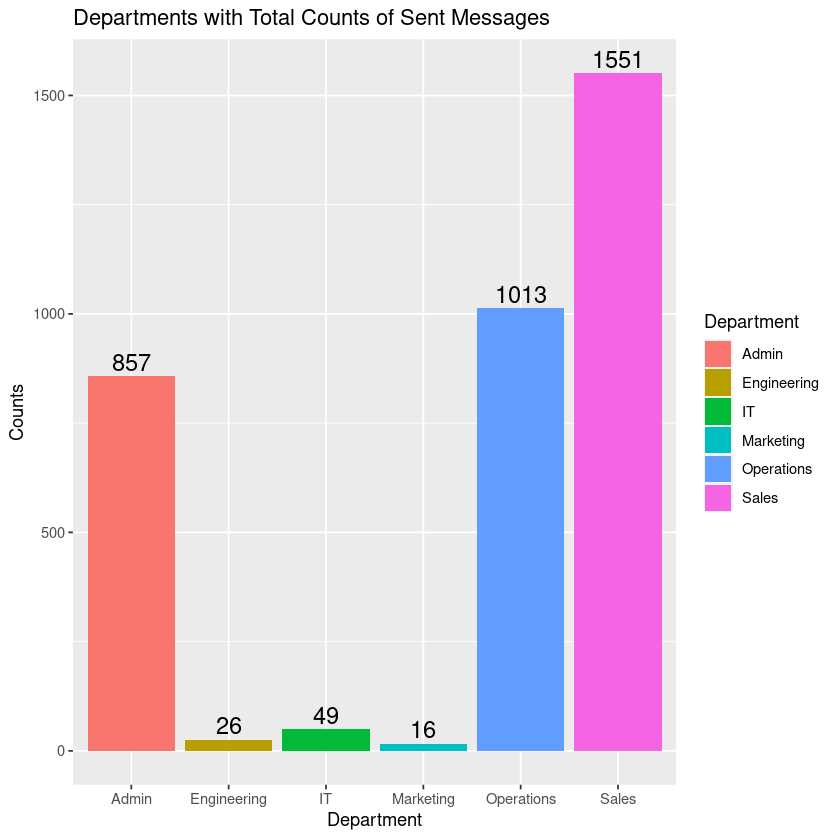

In [48]:
# Creating number of sender ID's counts for each department

library("dplyr") # Loading dplyr
senderInfo= merge(x=messages, y=employees, by.x=c("sender"), by.y=c("id"), sort=TRUE) # joining 'messages' and 'employees' data frame with respect to ID column
colnames(senderInfo)[1] = 'sender_ID' # renaming the sender column
senderInfo <- senderInfo %>% count(department, sender_ID, name="count") %>% select(-c(sender_ID))
senderInfo <- with(senderInfo, tapply(count,department,FUN=sum))
sender_count <- data.frame(senderInfo)
sender_count <- cbind(Department = rownames(sender_count), sender_count)
rownames(sender_count) <- 1:nrow(sender_count)
colnames(sender_count)[2]="Counts"
sender_count

library(ggplot2)
ggplot(data=sender_count, aes(x=Department, y=Counts, fill=Department)) + geom_bar(stat="identity") + geom_text(aes(label=Counts), vjust=-0.3, size=5) + labs(title="Departments with Total Counts of Sent Messages")

Now, have a look at total number of messages received by each department.

,Department,Counts
,<chr>,<int>
1,Admin,797
2,Engineering,252
3,IT,249
4,Marketing,140
5,Operations,845
6,Sales,1229


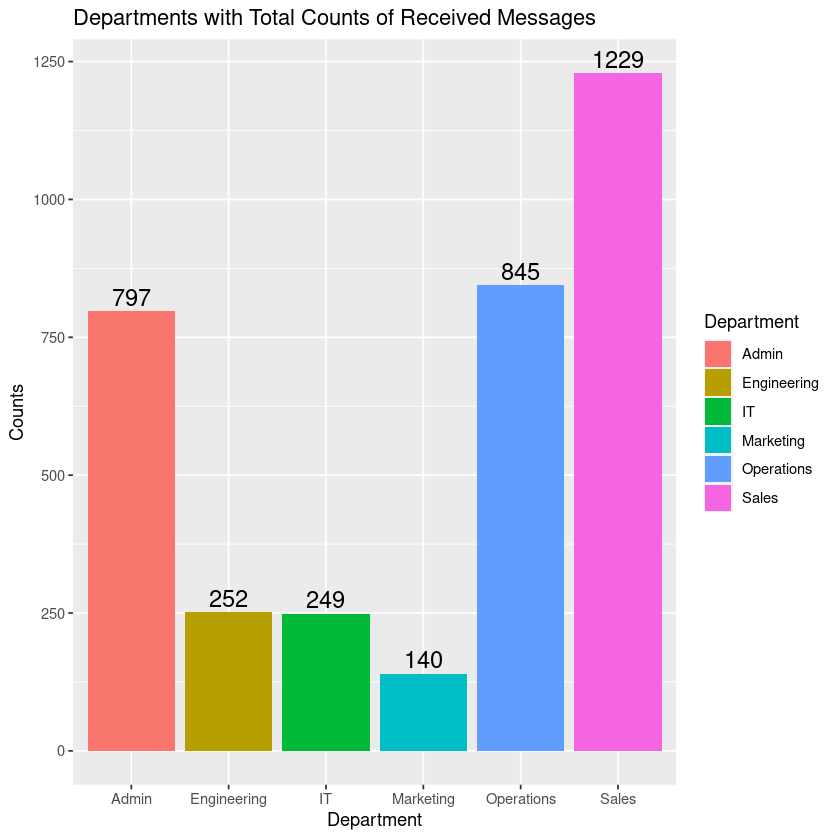

In [49]:
# Creating number of receiver ID's counts for each department

receiverInfo= merge(x=messages, y=employees, by.x=c("receiver"), by.y=c("id"), sort=TRUE) # joining 'messages' and 'employees' data frame with respect to ID column
colnames(receiverInfo)[1] = 'receiver_ID' # renaming the sender column
receiverInfo <- receiverInfo %>% count(department, receiver_ID, name="count") %>% select(-c(receiver_ID))
receiverInfo <- with(receiverInfo, tapply(count,department,FUN=sum))
receiver_count <- data.frame(receiverInfo)
receiver_count <- cbind(Department = rownames(receiver_count), receiver_count)
rownames(receiver_count) <- 1:nrow(receiver_count)
colnames(receiver_count)[2]="Counts"
receiver_count

# Plotting graph
library(ggplot2)
ggplot(data=receiver_count, aes(x=Department, y=Counts, fill=Department)) + geom_bar(stat="identity") + geom_text(aes(label=Counts), vjust=-0.3, size=5) + labs(title="Departments with Total Counts of Received Messages")

From above two graphs, it can be seen that:

Most sent and received messages are from SALES Department

Least send and received messages are from MARKETING Department
## Conclusion
Most active Department: SALES

Least active Department: MARKETING


## 2. Which employee has the most connections?
Let's find out total distinct IDs for each employee with whom they had connected (either as a sender or receiver).

In [50]:
#Creating dataframe displaying count of distinct receivers for each sender

sender_connection <- messages %>% group_by(sender) %>%
summarize(Count_Distinct_Receivers = n_distinct(receiver))
senderConnection <- sender_connection[order(as.integer(sender_connection$Count_Distinct_Receivers), decreasing=TRUE),]

#Creating dataframe displaying count of distinct senders for each receiver

receiver_connection <- messages %>% group_by(receiver) %>%
summarize(Count_Distinct_Senders = n_distinct(sender)) 
receiverConnection <- receiver_connection[order(as.integer(receiver_connection$Count_Distinct_Senders), decreasing=TRUE),]

# Creating a datafram to show total connections for each employee

merge_connection <- merge(x=senderConnection, y=receiverConnection, by.x="sender", by.y="receiver")
colnames(merge_connection)[1]="Employee_ID"
Connections <- merge_connection$Count_Distinct_Receivers + merge_connection$Count_Distinct_Senders
total_connections <-data.frame(merge_connection, Connections)
total_connections[order(total_connections$Connections, decreasing=TRUE),]

,Employee_ID,Count_Distinct_Receivers,Count_Distinct_Senders,Connections
,<dbl>,<int>,<int>,<int>
19,598,77,7,84
3,144,75,3,78
2,128,71,4,75
20,605,68,3,71
18,586,64,1,65
13,389,58,4,62
8,317,51,4,55
17,509,50,5,55
10,337,39,3,42


## Conclusion

 Employee with ID # 598 from OPERATIONS Department (US) has most connections.

## 3. Identify the most influential departments and employees.
Let's compare each department's collaboration within company in terms of sending messages and receiving messages:

,Department,Total_Messages_Sent_and_Received,percentage
,<chr>,<int>,<chr>
1,Admin,1654,23.55 %
2,Engineering,278,3.96 %
3,IT,298,4.24 %
4,Marketing,156,2.22 %
5,Operations,1858,26.45 %
6,Sales,2780,39.58 %


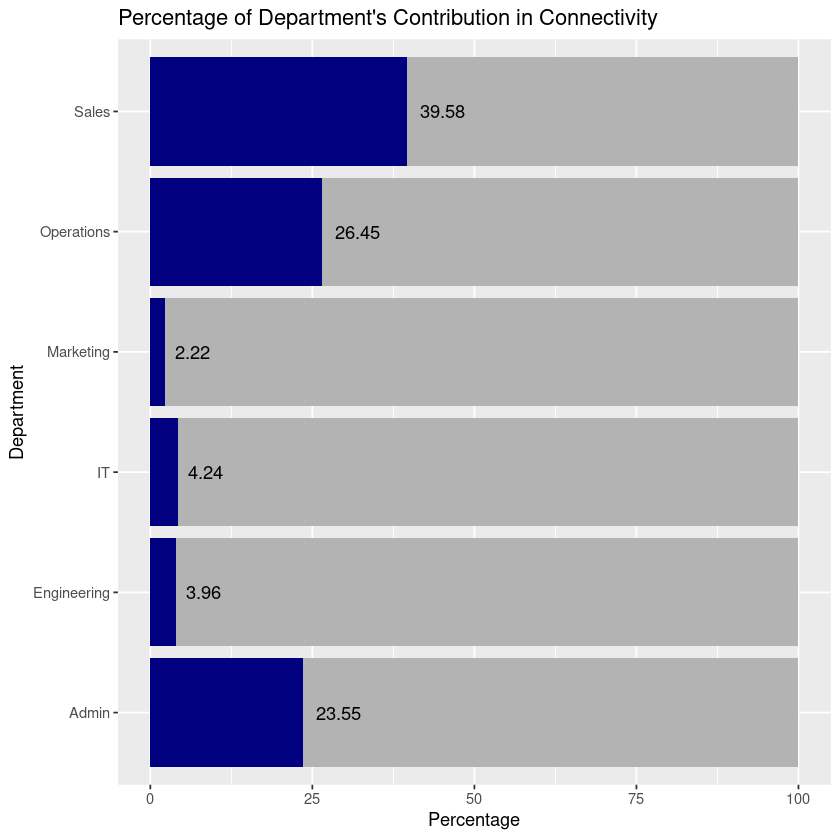

In [51]:
# Creating a dataframe to display total messages sent and received by each department
 
total = receiverInfo + senderInfo
total <- data.frame(total)
total <- cbind(Department = rownames(total), total)
rownames(total) <- 1:nrow(total)
colnames(total)[2]="Total_Messages_Sent_and_Received"
sum_of_counts <- sum(total$Total_Messages_Sent_and_Received)
Percentage = 100*(total$Total_Messages_Sent_and_Received/sum_of_counts)
Percentage <- round(Percentage,digits=2)
total <- data.frame(total,Percentage)
percentage <- paste(total$Percentage, "%", sep=" ")
percentage<-data.frame(total,percentage) %>% select(-c(Percentage))
percentage

# Plotting bar graph
ggplot(total, aes(Department, Percentage)) + geom_col(aes(y = 100), fill = "grey70") + geom_col(fill="navyblue") + geom_text(aes(label=Percentage), hjust=-0.3) + labs(title="Percentage of Department's Contribution in Connectivity") + coord_flip()

## Conclusion
Most Influential Departments are SALES, OPERATIONS and ADMIN respectively as they contribute upto 89.58 % in communication.

To find most influential employees, we will graph each employee's involvement in messaging with their roles as sender and receiver.

,Employee_ID,total_messages_sent_and_received
,<chr>,<int>
32,605,496
7,128,271
29,509,230
11,144,229
25,389,218


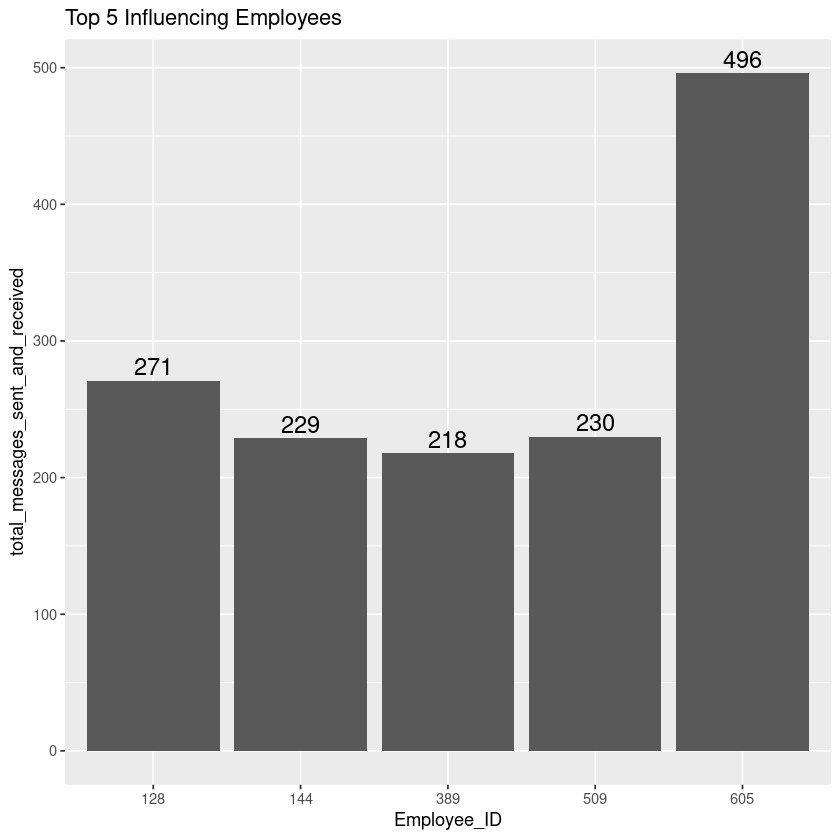

In [52]:
# Creating a dataframe to show top 5 employees with most collaboration through messaging

countreceiver <- messages %>% count(sender, receiver, name="Count_Receiver") %>% select(-c(receiver))
countreceiver <- with(countreceiver,tapply(Count_Receiver, sender, FUN=sum))
countreceiver <- data.frame(countreceiver)
countreceiver <- cbind(senderID = rownames(countreceiver), countreceiver)
rownames(countreceiver) <- 1:nrow(countreceiver)

countsender <- messages %>% count(receiver, sender, name="Count_Sender") %>% select(-c(sender))
countsender <- with(countsender,tapply(Count_Sender, receiver, FUN=sum))
countsender <- data.frame(countsender)
countsender <- cbind(receiverID = rownames(countsender), countsender)
rownames(countsender) <- 1:nrow(countsender)
 
total_count <- merge(x=countreceiver, y=countsender, by.x=c("senderID"), by.y=c("receiverID"))
total_count <-data.frame(total_count$senderID, total_count$countreceiver + total_count$countsender)
colnames(total_count)[1]="Employee_ID"
colnames(total_count)[2]="total_messages_sent_and_received"
total_count <- total_count[order(total_count$total_messages_sent_and_received, decreasing=TRUE),]
total_count <- head(total_count,5)
total_count

# Plotting bar graph
ggplot(data=total_count, aes(x=Employee_ID, y=total_messages_sent_and_received)) + geom_bar(stat="identity") + geom_text(aes(label=total_messages_sent_and_received), vjust=-0.3, size=5) + labs(title="Top 5 Influencing Employees")

## Conclusion
#### Top 5 Influencing Employee's are:

1. Employee with ID # 605

2. Employee with ID # 128

3. Employee with ID # 509

4. Employee with ID # 144

5. Employee with ID # 389

## Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

From Network Analysis performed, I would recommend the HR team to focus on boosting collaboration in following departments:
#### MARKETING, ENGINEERING and IT Departments